In [1]:
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import seaborn as sns
sns.set_style("white")

ModuleNotFoundError: No module named 'seaborn'

In [139]:
fullh2 = [1.0e11, 3.0e11, 9.0e11, 2.0e12, 5.0e12, 8.0e12, 1.0e13, 4.0e13, 7.0e13, 1.0e14]
procbbio = [0.2891360223470617, 0.2881647266800431, 0.5091647173808463, 0.34439275700290795, 0.20742860628071041, 0.17461193242615347, 0.16447872679482742, 0.12404821822655955, 0.1110234793168371, 0.10745174180878632]
earthbio =[0.05533745901990507, 0.05068361528176934, 0.04498518200695501, 0.04178994706647387, 0.04165122955175169, 0.04338665187064894, 0.04432185160247448, 0.022986858790015347, 0.013363123520124741, 0.010443781119371038]

earthabio = [3.773761378771928, 3.4203153304842138, 2.93152803815425, 2.7665233230686903, 3.263211215453541, 4.0210495216032776, 4.555895256345889, 12.293457080898666, 19.250668343188597, 25.832888820274412]
earthabiohighO=[6.733835788104522, 6.4304770547441485, 5.5711236043953285, 4.143266533953159, 1.2425536619973878, 0.4305076992907124, 0.296514302581968, 0.08771146031706155, 0.07557670812536862, 0.07179575558404187]

procbabio = [1283.1218144412508, 867.5523320796959, 268.75109280490847, 284.9536056100937, 62.04256058403794, 51.889586851170755, 48.61340953157152, 354.1002609139183, 387.6135264269688, 405.60890773425706] #5th value suspicious

<ipython-input-140-6c9ed03a6411>:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-140-6c9ed03a6411>:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


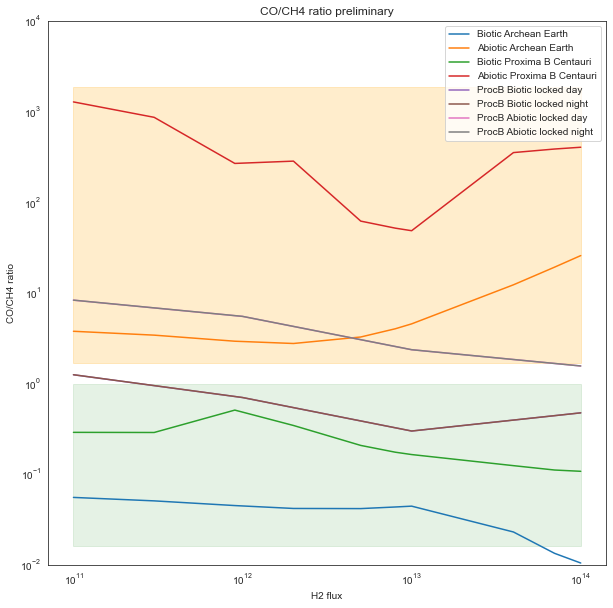

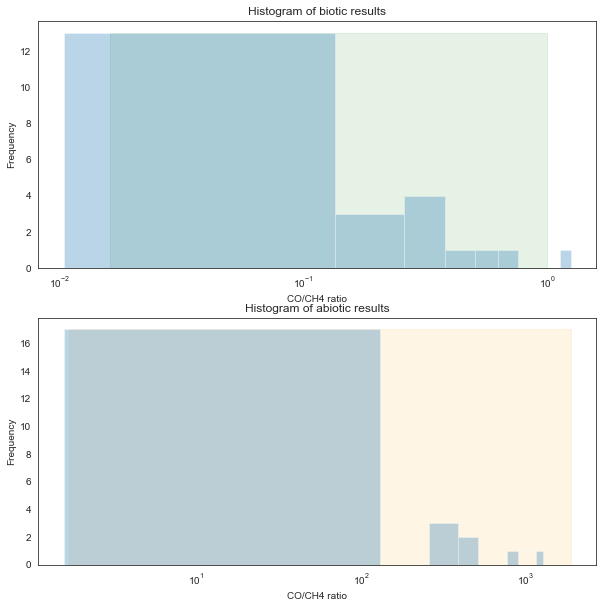

In [140]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(1,1)

ax.set_title("CO/CH4 ratio preliminary")

fig4 = plt.figure(figsize=(10,10))
axs = fig4.subplots(2,1)

abioticvals = earthabio+tpad+procbabio
bioticvals = earthbio+tpbd+procbbio


height, bins, patches = axs[0].hist(bioticvals, alpha=0.3)
ci = lognorm(*lognorm.fit(bioticvals)).interval(0.9)  # fit a normal distribution and get 95% c.i.
axs[0].fill_betweenx([0, height.max()], ci[0], ci[1], color='g', alpha=0.1)  # Mark between 0 and the highest bar in the histogram
axs[0].set_xscale('log')

height2, bins2, patches2 = axs[1].hist(abioticvals, alpha=0.3)
ci2 = lognorm(*lognorm.fit(abioticvals)).interval(0.9)  # fit a normal distribution and get 95% c.i.
axs[1].fill_betweenx([0, height2.max()], ci2[0], ci2[1], color='orange', alpha=0.1)  # Mark between 0 and the highest bar in the histogram
axs[1].set_xscale('log')

axs[1].set_xlabel("CO/CH4 ratio")
axs[0].set_xlabel("CO/CH4 ratio")
axs[1].set_ylabel("Frequency")
axs[0].set_ylabel("Frequency")
axs[1].set_title("Histogram of abiotic results")
axs[0].set_title("Histogram of biotic results")



ax.plot(fullh2,earthbio, label = "Biotic Archean Earth")
ax.plot(fullh2, earthabio,label = "Abiotic Archean Earth")
ax.plot(fullh2,procbbio, label = "Biotic Proxima B Centauri")
ax.plot(fullh2, procbabio,label = "Abiotic Proxima B Centauri")

ax.plot([1.0e11,1.0e12,1.0e13,1.0e14], tpbd, label = "ProcB Biotic locked day")
ax.plot([1.0e11,1.0e12,1.0e13,1.0e14], tpbn, label = "ProcB Biotic locked night")
ax.plot([1.0e11,1.0e12,1.0e13,1.0e14], tpad, label = "ProcB Abiotic locked day")
ax.plot([1.0e11,1.0e12,1.0e13,1.0e14], tpan, label = "ProcB Abiotic locked night")




#ax.plot(H2, v, label = "two-col abiotic")

ax.set_xlabel("H2 flux")
ax.set_ylabel("CO/CH4 ratio")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10e-3,10e3)


ax.fill_betweenx([ci[0],ci[1]],1.0e11,1.0e14,color='g', alpha=0.1)
ax.fill_betweenx([ci2[0],ci2[1]],1.0e11,1.0e14,color='orange', alpha=0.2)

ax.legend()


fig.show()
fig4.show()
#fig.savefig("COCH4 tidallocked.png")

In [135]:
tidalprocbiotic = [[1.2495766053335242, 1.2511225436489442],
[0.7002565393922668, 0.7008267172183479],
[0.2990258799546491, 0.29905859293597836],
[0.474708861413486, 0.4747321729529762]]

tpbd=[]
tpbn=[]
for i in tidalprocbiotic:
    tpbd.append(i[0])
    tpbn.append(i[1])

    
tidalprocabiotic=[[8.31777018728701, 8.328611065374812],
[5.506520429197846, 5.511988698247864],
[2.3616478353071204, 2.3625209720747735],
[1.5624206601507604, 1.5624294620498627]]
tpad=[]
tpan=[]
for i in tidalprocabiotic:
    tpad.append(i[0])
    tpan.append(i[1])

<ipython-input-136-6c9ed03a6411>:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-136-6c9ed03a6411>:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


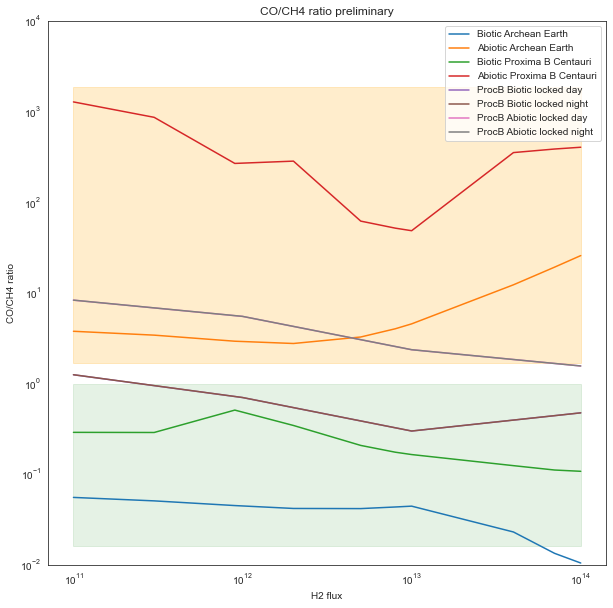

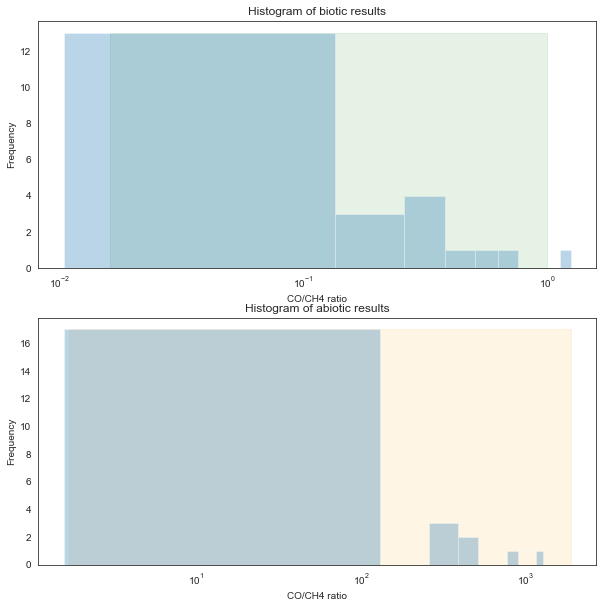

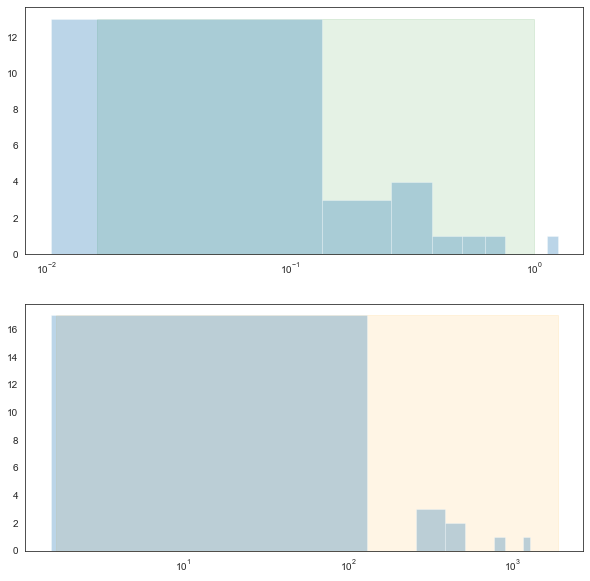

In [126]:
fig4 = plt.figure(figsize=(10,10))
axs = fig4.subplots(2,1)

abioticvals = earthabio+tpad+procbabio
bioticvals = earthbio+tpbd+procbbio


height, bins, patches = axs[0].hist(bioticvals, alpha=0.3)
ci = lognorm(*lognorm.fit(bioticvals)).interval(0.9)  # fit a normal distribution and get 95% c.i.
axs[0].fill_betweenx([0, height.max()], ci[0], ci[1], color='g', alpha=0.1)  # Mark between 0 and the highest bar in the histogram
axs[0].set_xscale('log')

height2, bins2, patches2 = axs[1].hist(abioticvals, alpha=0.3)
ci2 = lognorm(*lognorm.fit(abioticvals)).interval(0.9)  # fit a normal distribution and get 95% c.i.
axs[1].fill_betweenx([0, height2.max()], ci2[0], ci2[1], color='orange', alpha=0.1)  # Mark between 0 and the highest bar in the histogram
axs[1].set_xscale('log')


Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.lognorm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



(6.24903644663666, 0.010443781119371037, 0.05701423817955664)